# Logarithmic Returns in Python

In [17]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [4]:
start=pd.to_datetime('2010-01-01', format='%Y-%m-%d')
today_date = datetime.today().strftime('%Y-%m-%d')

ES=F: SP500 E-mini Future
ZN=F: 10-Year T-Note Futures

In [7]:
# Download front -month futures data 
tickers = ["ES=F", "ZN=F"]
prices = yf.download(tickers)["Adj Close"] 
print(prices)

[*********************100%%**********************]  2 of 2 completed

Ticker         ES=F        ZN=F
Date                           
2000-09-18  1467.50         NaN
2000-09-19  1478.50         NaN
2000-09-20  1469.50         NaN
2000-09-21  1469.50   99.953133
2000-09-22  1468.50   99.828133
...             ...         ...
2024-08-05  5217.50  114.078125
2024-08-06  5266.25  113.390625
2024-08-07  5227.50  112.890625
2024-08-08  5348.25  112.656250
2024-08-09  5370.25  112.953125

[6039 rows x 2 columns]


In [8]:
# Compute ln(p_t) - ln(p_(t-1)) using diff method
log_returns = np.log(prices).diff() 
print(log_returns)

Ticker          ES=F      ZN=F
Date                          
2000-09-18       NaN       NaN
2000-09-19  0.007468       NaN
2000-09-20 -0.006106       NaN
2000-09-21  0.000000       NaN
2000-09-22 -0.000681 -0.001251
...              ...       ...
2024-08-05 -0.029926 -0.000548
2024-08-06  0.009300 -0.006045
2024-08-07 -0.007385 -0.004419
2024-08-08  0.022836 -0.002078
2024-08-09  0.004105  0.002632

[6039 rows x 2 columns]


3 different ways to compute the same thing:

In [9]:
# Compute ln(p_t/p_(t-1))
log_returns = np.log(prices / prices.shift(1))

# Compute ln(p_t) - ln(p_(t-1))
log_returns = np.log(prices) - np.log(prices.shift(1))

# Compute ln(p_t) - ln(p_(t-1)) again, but using diff method
log_returns = np.log(prices).diff()

# Arithmetic vs Logarithmic Cumulative Returns

In [10]:
# Download S&P 500 futures data
prices = yf.download("ES=F")["Adj Close"]

[*********************100%%**********************]  1 of 1 completed


In [11]:
# Compute logarithmic returns
log_returns = np.log(prices).diff()

In [12]:
# Compute arithmetic returns
ari_returns = prices.pct_change()

In [14]:
# Compute cumulative returns
log_cum_returns = np.cumsum(log_returns) 
ari_cum_returns = (1+ari_returns).cumprod() - 1

In [15]:
# Compute accumulated error
accumulated_error = ari_cum_returns - log_cum_returns

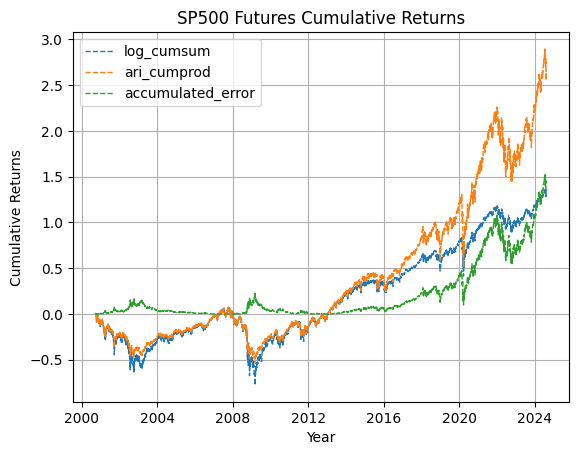

In [25]:
plt.plot(log_cum_returns, label="log_cumsum", linestyle="--", linewidth=1)
plt.plot(ari_cum_returns, label="ari_cumprod", linestyle="--", linewidth=1)
plt.plot(accumulated_error, label="accumulated_error", linestyle="--", linewidth=1)
#plt.fill_between(accumulated_error,0)
plt.xlabel("Year")
plt.ylabel('Cumulative Returns') 
plt.title('SP500 Futures Cumulative Returns') 
plt.legend()
plt.grid()
plt.show()

Need to np.exp the log_returns

In [29]:
log_cum_returns = np.exp(np.cumsum(log_returns)) - 1
ari_cum_returns = (1+ari_returns).cumprod() - 1
accumulated_error = ari_cum_returns - log_cum_returns

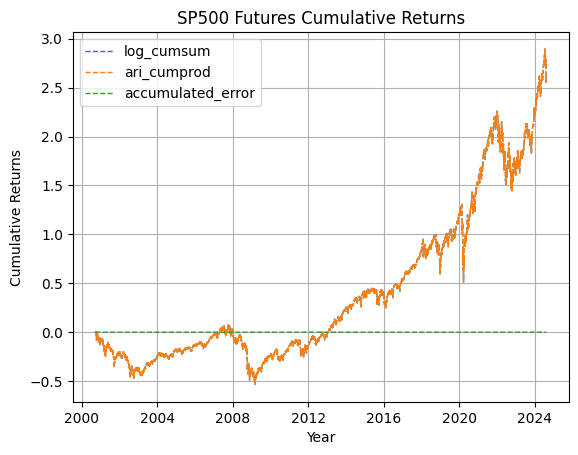

In [30]:
plt.plot(log_cum_returns, label="log_cumsum", linestyle="--", linewidth=1)
plt.plot(ari_cum_returns, label="ari_cumprod", linestyle="--", linewidth=1)
plt.plot(accumulated_error, label="accumulated_error", linestyle="--", linewidth=1)
#plt.fill_between(accumulated_error,0)
plt.xlabel("Year")
plt.ylabel('Cumulative Returns') 
plt.title('SP500 Futures Cumulative Returns') 
plt.legend()
plt.grid()
plt.show()